<a href="https://colab.research.google.com/github/Wallzers/Covid_19_predictions/blob/main/Covid_19_detector_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import pickle
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf

In [ ]:
DIRECTORY = '/content/drive/MyDrive/train'

CATEGORIES = ['NORMAL','PNEUMONIA']

In [ ]:

data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])

In [ ]:
data

[[array([[39, 33, 33, ..., 29, 29, 27],
         [35, 33, 33, ..., 27, 27, 28],
         [33, 30, 30, ..., 23, 22, 25],
         ...,
         [26, 28, 28, ..., 34, 30, 35],
         [30, 29, 28, ..., 29, 32, 36],
         [30, 27, 26, ..., 29, 32, 35]], dtype=uint8), 0],
 [array([[ 34,  51,  95, ..., 134, 123, 114],
         [ 35,  33,  92, ..., 135, 126, 105],
         [ 36,  23,  84, ..., 141, 129, 100],
         ...,
         [ 38,  42,  41, ...,  33,  33,  31],
         [ 38,  40,  38, ...,  33,  32,  34],
         [ 37,  41,  38, ...,  31,  31,  33]], dtype=uint8), 0],
 [array([[12, 12, 13, ..., 10,  3,  5],
         [12, 12, 13, ..., 52, 48, 33],
         [13, 12, 12, ..., 97, 78, 64],
         ...,
         [12, 12,  7, ..., 13, 15, 16],
         [14, 13,  8, ..., 14, 15, 17],
         [13, 11,  9, ..., 13, 14, 15]], dtype=uint8), 0],
 [array([[ 80,  80, 104, ..., 101, 113, 152],
         [ 85,  78,  91, ..., 110, 113, 158],
         [107, 109,  89, ...,  97, 118, 160],
       

In [ ]:
random.shuffle(data)

In [ ]:
x =[]
y = []
for features, labels in data:
  x.append(features)
  y.append(labels)


In [ ]:
X = np.array(x)
Y = np.array(y)

In [ ]:
X = X/255
print(X)

[[[0.14509804 0.14509804 0.1372549  ... 0.14509804 0.16470588 0.16862745]
  [0.14509804 0.12941176 0.1254902  ... 0.14901961 0.16862745 0.15686275]
  [0.11764706 0.09411765 0.11372549 ... 0.15294118 0.14901961 0.16470588]
  ...
  [0.1372549  0.14117647 0.1254902  ... 0.15294118 0.15294118 0.16078431]
  [0.13333333 0.1372549  0.1254902  ... 0.16470588 0.17254902 0.15294118]
  [0.14117647 0.14901961 0.14509804 ... 0.16078431 0.16862745 0.18039216]]

 [[0.         0.         0.03921569 ... 0.02352941 0.02352941 0.        ]
  [0.         0.         0.03529412 ... 0.09019608 0.09411765 0.        ]
  [0.         0.         0.04313725 ... 0.30980392 0.30588235 0.        ]
  ...
  [0.         0.         0.03921569 ... 0.03921569 0.05098039 0.        ]
  [0.         0.         0.03921569 ... 0.03921569 0.03137255 0.        ]
  [0.         0.         0.03921569 ... 0.03921569 0.03137255 0.        ]]

 [[0.         0.         0.39607843 ... 0.         0.         0.        ]
  [0.         0.      

In [ ]:
print(Y)

[0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1
 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1]


In [ ]:
X = X.reshape(-1, 60, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X, Y, epochs=10)

Epoch 1/10
5/5 [==============================] - 23s 183ms/step - loss: 0.7369 - accuracy: 0.4783
Epoch 2/10
5/5 [==============================] - 1s 179ms/step - loss: 0.6340 - accuracy: 0.6597
Epoch 3/10
5/5 [==============================] - 1s 180ms/step - loss: 0.5088 - accuracy: 0.9175
Epoch 4/10
5/5 [==============================] - 1s 186ms/step - loss: 0.3082 - accuracy: 0.9122
Epoch 5/10
5/5 [==============================] - 1s 190ms/step - loss: 0.1773 - accuracy: 0.9407
Epoch 6/10
5/5 [==============================] - 1s 182ms/step - loss: 0.1509 - accuracy: 0.9440
Epoch 7/10
5/5 [==============================] - 1s 181ms/step - loss: 0.1202 - accuracy: 0.9622
Epoch 8/10
5/5 [==============================] - 1s 181ms/step - loss: 0.0654 - accuracy: 0.9819
Epoch 9/10
5/5 [==============================] - 1s 182ms/step - loss: 0.0589 - accuracy: 0.9737
Epoch 10/10
5/5 [==============================] - 1s 185ms/step - loss: 0.0648 - accuracy: 0.9869


In [ ]:

def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr




Text(0.5, 0, 'PNEUMONIA')

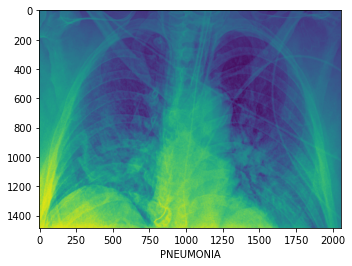

In [ ]:

img = cv2.imread('/content/drive/MyDrive/train/PNEUMONIA/171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg', cv2.IMREAD_GRAYSCALE)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
prediction = model.predict([image('/content/drive/MyDrive/train/PNEUMONIA/171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg')])
plt.imshow(img)
plt.xlabel(CATEGORIES[prediction.argmax()])
                               
                                